In [1]:
import numpy as np
import pandas as p
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [2]:
df=p.read_csv(r"C:\Users\KALIPATNAPU\Desktop\577\Indian Liver Patient Dataset (ILPD).csv")

In [3]:
df

,age,gender,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos,is_patient
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
5,46,Male,1.8,0.7,208,19,14,7.6,4.4,1.30,1
6,26,Female,0.9,0.2,154,16,12,7.0,3.5,1.00,1
7,29,Female,0.9,0.3,202,14,11,6.7,3.6,1.10,1
8,17,Male,0.9,0.3,202,22,19,7.4,4.1,1.20,2
9,55,Male,0.7,0.2,290,53,58,6.8,3.4,1.00,1


In [4]:
df.isnull().any()

age                 False
gender              False
tot_bilirubin       False
direct_bilirubin    False
tot_proteins        False
albumin             False
ag_ratio            False
sgpt                False
sgot                False
alkphos              True
is_patient          False
dtype: bool

In [5]:
df.fillna(df.mean(),inplace=True)

In [6]:
df.isnull().any()

age                 False
gender              False
tot_bilirubin       False
direct_bilirubin    False
tot_proteins        False
albumin             False
ag_ratio            False
sgpt                False
sgot                False
alkphos             False
is_patient          False
dtype: bool

In [7]:
x=df.iloc[:,:10].values

In [8]:
x

array([[65, 'Female', 0.7, ..., 6.8, 3.3, 0.9],
       [62, 'Male', 10.9, ..., 7.5, 3.2, 0.74],
       [62, 'Male', 7.3, ..., 7.0, 3.3, 0.89],
       ...,
       [52, 'Male', 0.8, ..., 6.4, 3.2, 1.0],
       [31, 'Male', 1.3, ..., 6.8, 3.4, 1.0],
       [38, 'Male', 1.0, ..., 7.3, 4.4, 1.5]], dtype=object)

In [9]:
y=df.iloc[:,10:].values

In [10]:
y

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [2],
       [1],
       [1],
       [1],
       [2],
       [1],
       [1],
       [2],
       [1],
       [2],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [2],
       [1],
       [1],
       [1],
       [2],
       [2],
       [1],
       [1],
       [2],
       [2],
       [2],
       [1],
       [2],
       [1],
       [1],
       [1],
       [1],
       [2],
       [2],
       [1],
       [2],
       [2],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [2],
       [2],
       [1],
       [2],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [2],
       [1],
       [1],
       [1],
       [1],
       [1],
       [2],
       [1],
       [1],
       [2],
       [1],
       [1],
       [1],
       [2],
    

In [11]:
from sklearn.preprocessing import LabelEncoder
lb_x=LabelEncoder()
lb_y=LabelEncoder()
x[:,1]=lb_x.fit_transform(x[:,1])
y[:,0]=lb_y.fit_transform(y[:,0])

In [12]:
y

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
    

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [14]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [15]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5, p=2)
knn.fit(x_train,y_train)
y_pred_knn=knn.predict(x_test)
ac_knn=accuracy_score(y_test,y_pred_knn)
confusion_matrix(y_test,y_pred_knn)
fpr, tpr, threshold=metrics.roc_curve(y_test,y_pred_knn)
roc_auc_knn=metrics.auc(fpr,tpr)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [16]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred_lr=lr.predict(x_test)
ac_lr=accuracy_score(y_test,y_pred_lr)
confusion_matrix(y_test,y_pred_lr)
fpr, tpr, threshold=metrics.roc_curve(y_test,y_pred_lr)
roc_auc_lr=metrics.auc(fpr,tpr)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [17]:
from sklearn.svm import SVC
sv=SVC(kernel="rbf")
sv.fit(x_train,y_train)
y_pred_sv=sv.predict(x_test)
ac_sv=accuracy_score(y_test,y_pred_sv)
confusion_matrix(y_test,y_pred_sv)
fpr, tpr, threshold=metrics.roc_curve(y_test,y_pred_sv)
roc_auc_sv=metrics.auc(fpr,tpr)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [18]:
from sklearn.svm import SVC
svm=SVC(kernel="linear")
svm.fit(x_train,y_train)
y_pred_svm=svm.predict(x_test)
ac_svm=accuracy_score(y_test,y_pred_svm)
confusion_matrix(y_test,y_pred_svm)
fpr, tpr, threshold=metrics.roc_curve(y_test,y_pred_svm)
roc_auc_svm=metrics.auc(fpr,tpr)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [19]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred_dt=dt.predict(x_test)
ac_dt=accuracy_score(y_test,y_pred_dt)
confusion_matrix(y_test,y_pred_dt)
fpr, tpr, threshold=metrics.roc_curve(y_test,y_pred_dt)
roc_auc_dt=metrics.auc(fpr,tpr)

In [20]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=1000)
rfc.fit(x_train,y_train)
y_pred_rfc=rfc.predict(x_test)
ac_rfc=accuracy_score(y_test,y_pred_rfc)
confusion_matrix(y_test,y_pred_rfc)
fpr, tpr, threshold=metrics.roc_curve(y_test,y_pred_rfc)
roc_auc_rfc=metrics.auc(fpr,tpr)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [21]:
x=["LR","KNN","Linear SVM","DT","Gaussian SVM","RFC"]
roc_auc=[roc_auc_lr,roc_auc_knn,roc_auc_svm,roc_auc_dt,roc_auc_sv,roc_auc_rfc]

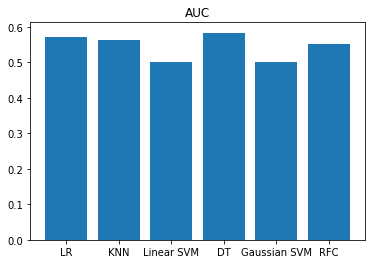

In [22]:
import matplotlib.pyplot as plt
plt.title('AUC')
plt.bar(x, roc_auc)
plt.show()

<function matplotlib.pyplot.legend(*args, **kwargs)>

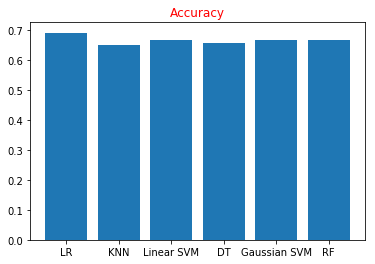

In [23]:
x=["LR","KNN","Linear SVM","DT","Gaussian SVM","RF"]
y=[ac_lr,ac_knn,ac_svm,ac_dt,ac_sv,ac_rfc]
plt.bar(x,y)
plt.title("Accuracy",color='r')
plt.legend